Genkendelse af håndskrift
===


In [1]:
!python.exe -m pip install --upgrade pip
!pip install torch
!pip install torchvision
!pip install matplotlib

In [2]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Transform PIL image into a tensor. The values are in the range [0, 1]
t = transforms.ToTensor()

# Load datasets for training and testing.
mnist_training = datasets.MNIST(root='/tmp/mnist', train=True, download=True, transform=t)
mnist_val = datasets.MNIST(root='/tmp/mnist', train=False, download=True, transform =t)


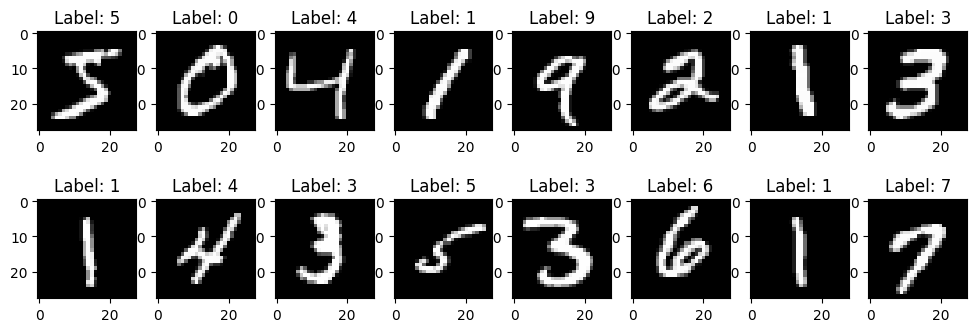

In [3]:
# Plot some digits.
cols = 8
rows = 2

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(1.5*cols, 2*rows))
for i, ax in enumerate(axes.flatten()):
    image, label = mnist_training[i] # returns PIL image with its labels
    ax.set_title(f"Label: {label}")
    ax.imshow(image.squeeze(0), cmap='gray') # we get a 1x28x28 tensor -> remove first dimension
plt.show()

In [4]:
mnist_training[317]
# Label er 2
print('Label til nummer 317: ', mnist_training[317][1])

# antal sorte pixellinjer
number_p = 0
for x in mnist_training[317][0][0]:
    #print(x)  
    if sum(x) == 0: # hvidt -> 1
        number_p += 1

print('Antal pixellinjer, der er sorte: ', number_p) # der er 20 pixellinjer, der er sorte

Label til nummer 317:  2
Antal pixellinjer, der er sorte:  8


Heraf ses at der er 20 sorte pixellinjer. 

Label til sampel 317 er 2.

Nedenfor er sampel 317 plottet.

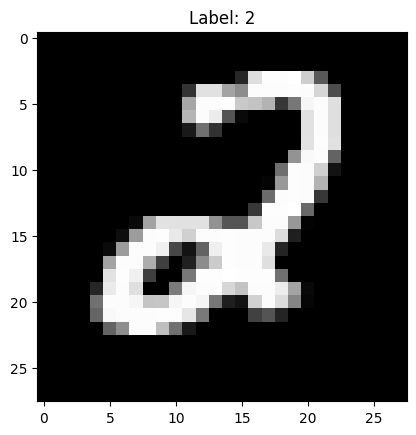

In [5]:
def show_image(sample_nr):
    image, label = mnist_training[sample_nr] # returns PIL image with its labels
    plt.title(f"Label: {label}")
    plt.imshow(image[0], cmap='grey')
    plt.show()

show_image(317)

In [6]:
def model_A():
    model = torch.nn.Sequential(
        torch.nn.Linear(28*28, 256),
        torch.nn.ReLU(),
        torch.nn.Linear(256, 10)
    )
    
    # Use Adam as optimizer.
    opt = torch.optim.Adam(params=model.parameters(), lr=0.01)
    
    # Use CrossEntropyLoss for as loss function.
    loss_fn = torch.nn.CrossEntropyLoss()
    return model, opt, loss_fn


In [7]:
# We train the model with batches of 500 examples.

def train_model(data, model, batch_size, epochs):
    model, opt, loss_fn = model
    train_loader = torch.utils.data.DataLoader(data, batch_size=batch_size, shuffle=True)
    
    losses = []
    
    for epoch in range(epochs):
        for imgs, labels in train_loader:
            n = len(imgs)
            # Reshape data from [500, 1, 28, 28] to [500, 784] and use the model to make predictions.
            predictions = model(imgs.view(n, -1))
            # Compute the loss.
            loss = loss_fn(predictions, labels)
            opt.zero_grad()
            loss.backward()
            opt.step()
            losses.append(float(loss))
        print(f"Epoch: {epoch}, Loss: {float(loss)}")

    return model

model_500_10 = train_model(mnist_training, model_A(), 500, 10)


Epoch: 0, Loss: 0.12597645819187164
Epoch: 1, Loss: 0.11742695420980453
Epoch: 2, Loss: 0.10997267812490463
Epoch: 3, Loss: 0.06562718749046326
Epoch: 4, Loss: 0.078516386449337
Epoch: 5, Loss: 0.018506864085793495
Epoch: 6, Loss: 0.02058851346373558
Epoch: 7, Loss: 0.0338761992752552
Epoch: 8, Loss: 0.042200058698654175
Epoch: 9, Loss: 0.03863877058029175


In [8]:
model_500_30 = train_model(mnist_training, model_A(), 500, 30)

Epoch: 0, Loss: 0.12494473904371262
Epoch: 1, Loss: 0.05140899866819382
Epoch: 2, Loss: 0.09692344069480896
Epoch: 3, Loss: 0.048287082463502884
Epoch: 4, Loss: 0.03735419362783432
Epoch: 5, Loss: 0.03717246279120445
Epoch: 6, Loss: 0.02098282054066658
Epoch: 7, Loss: 0.011109776794910431
Epoch: 8, Loss: 0.01541009359061718
Epoch: 9, Loss: 0.04241028428077698
Epoch: 10, Loss: 0.01799962855875492
Epoch: 11, Loss: 0.010780255310237408
Epoch: 12, Loss: 0.017446007579565048
Epoch: 13, Loss: 0.007512304000556469
Epoch: 14, Loss: 0.017496692016720772
Epoch: 15, Loss: 0.0058336504735052586
Epoch: 16, Loss: 0.03414035961031914
Epoch: 17, Loss: 0.030342979356646538
Epoch: 18, Loss: 0.020673338323831558
Epoch: 19, Loss: 0.016923867166042328
Epoch: 20, Loss: 0.028895504772663116
Epoch: 21, Loss: 0.019883746281266212
Epoch: 22, Loss: 0.01957871951162815
Epoch: 23, Loss: 0.011051014997065067
Epoch: 24, Loss: 0.032311610877513885
Epoch: 25, Loss: 0.02101687155663967
Epoch: 26, Loss: 0.00800751987844

In [9]:
model_1500_10 = train_model(mnist_training, model_A(), 1500, 10)

Epoch: 0, Loss: 0.1721230447292328
Epoch: 1, Loss: 0.14556020498275757
Epoch: 2, Loss: 0.06052384898066521
Epoch: 3, Loss: 0.07146143913269043
Epoch: 4, Loss: 0.048121094703674316
Epoch: 5, Loss: 0.042457450181245804
Epoch: 6, Loss: 0.03006749041378498
Epoch: 7, Loss: 0.030791928991675377
Epoch: 8, Loss: 0.018596090376377106
Epoch: 9, Loss: 0.02028140425682068


In [10]:
model_1500_20 = train_model(mnist_training, model_A(), 1500, 20)

Epoch: 0, Loss: 0.20896115899085999
Epoch: 1, Loss: 0.143406942486763
Epoch: 2, Loss: 0.09331905841827393
Epoch: 3, Loss: 0.062318798154592514
Epoch: 4, Loss: 0.05105986446142197
Epoch: 5, Loss: 0.052867792546749115
Epoch: 6, Loss: 0.03666239231824875
Epoch: 7, Loss: 0.029920868575572968
Epoch: 8, Loss: 0.012825733050704002
Epoch: 9, Loss: 0.012667444534599781
Epoch: 10, Loss: 0.01237738411873579
Epoch: 11, Loss: 0.0065695191733539104
Epoch: 12, Loss: 0.010741335339844227
Epoch: 13, Loss: 0.006770837586373091
Epoch: 14, Loss: 0.0036702819634228945
Epoch: 15, Loss: 0.0054555232636630535
Epoch: 16, Loss: 0.002523103030398488
Epoch: 17, Loss: 0.0015823075082153082
Epoch: 18, Loss: 0.0008854767656885087
Epoch: 19, Loss: 0.0009914400288835168


In [11]:
# Determine the accuracy of our classifier
# Load all 10000 images from the validation set.
n = 10000
loader = torch.utils.data.DataLoader(mnist_val, batch_size=n)

#images, labels = iter(loader).next()
images, labels = next(iter(loader))

# The tensor images has the shape [10000, 1, 28, 28]. Reshape the tensor to
# [10000, 784] as our model expected a flat vector.
data = images.view(n, -1)


In [12]:
def test_model(data, labels, model):
    predictions = model(data)
    predicted_classes = torch.argmax(predictions, dim=1)

    accuracy = sum(predicted_classes.numpy() == labels.numpy()) / 10000
    print(accuracy)
    return predicted_classes, accuracy

test_model(data, labels, model_500_10)
test_model(data, labels, model_500_30)
test_model(data, labels, model_1500_10)
predicted_classes, ac = test_model(data, labels, model_1500_20)


0.9752
0.9763
0.9787
0.9803


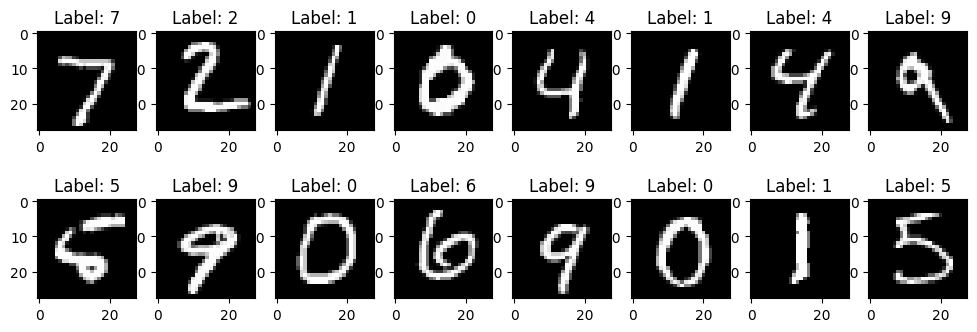

In [13]:
cols = 8
rows = 2

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(1.5*cols, 2*rows))
for i, ax in enumerate(axes.flatten()):
    image, label = images[i],labels[i]          # returns PIL image with its labels
    ax.set_title(f"Label: {label}")
    ax.imshow(image.squeeze(0), cmap='gray')  # we get a 1x28x28 tensor -> remove first dimension
plt.show()

In [14]:
errors = []

print(" i, prediction, label")
for n in range(10000):
    if (predicted_classes[n] != labels[n]):
        print(n,predicted_classes[n],labels[n])
        errors.append(n)
    
print("length:",errors.__len__())

 i, prediction, label
149 tensor(9) tensor(2)
217 tensor(5) tensor(6)
247 tensor(2) tensor(4)
321 tensor(7) tensor(2)
340 tensor(3) tensor(5)
381 tensor(7) tensor(3)
445 tensor(0) tensor(6)
448 tensor(8) tensor(9)
495 tensor(2) tensor(8)
582 tensor(2) tensor(8)
613 tensor(8) tensor(2)
619 tensor(8) tensor(1)
684 tensor(3) tensor(7)
691 tensor(4) tensor(8)
720 tensor(8) tensor(5)
726 tensor(9) tensor(7)
882 tensor(7) tensor(9)
900 tensor(3) tensor(1)
947 tensor(9) tensor(8)
951 tensor(4) tensor(5)
956 tensor(2) tensor(1)
965 tensor(0) tensor(6)
1003 tensor(3) tensor(5)
1014 tensor(5) tensor(6)
1112 tensor(6) tensor(4)
1156 tensor(8) tensor(7)
1178 tensor(0) tensor(4)
1226 tensor(2) tensor(7)
1232 tensor(4) tensor(9)
1242 tensor(9) tensor(4)
1247 tensor(5) tensor(9)
1299 tensor(7) tensor(5)
1319 tensor(3) tensor(8)
1328 tensor(9) tensor(7)
1393 tensor(3) tensor(5)
1500 tensor(1) tensor(7)
1530 tensor(7) tensor(8)
1549 tensor(6) tensor(4)
1609 tensor(6) tensor(2)
1678 tensor(0) tensor(2)


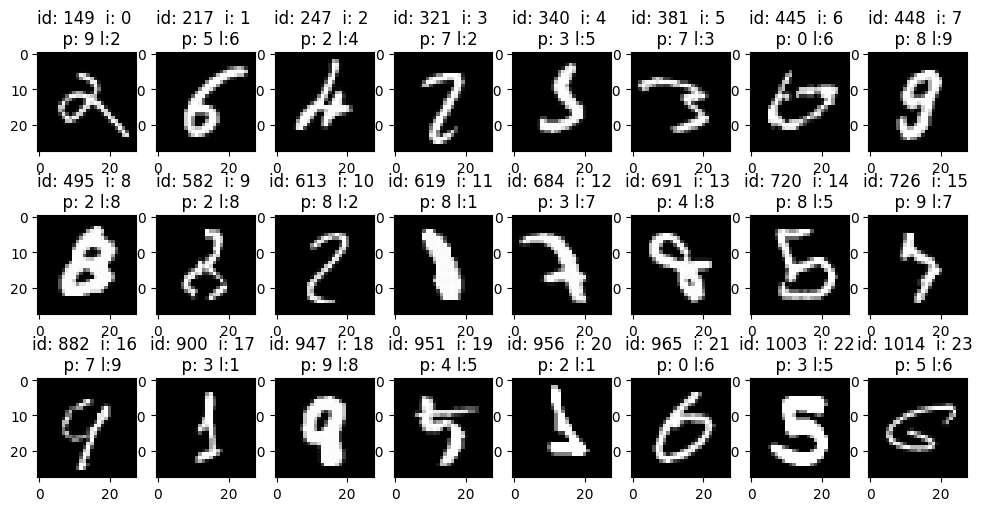

In [15]:
cols = 8
rows = 3

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(1.5*cols, 2*rows))
for i, ax in enumerate(axes.flatten()):
    image, label = images[errors[i]],labels[predicted_classes[errors[i]]]          # returns PIL image with its labels
    ax.set_title(f"id: {errors[i]}  i: {i} \n  p: {predicted_classes[errors[i]]} l:{labels[errors[i]]}")
    ax.imshow(image.squeeze(0), cmap='gray')  # we get a 1x28x28 tensor -> remove first dimension
plt.show()

In [22]:
def model_B():
    model = torch.nn.Sequential(
        torch.nn.Linear(28*28, 256),
        torch.nn.ReLU(),
        torch.nn.Linear(256, 256),
        torch.nn.ReLU(),
        torch.nn.Linear(256, 10)
    )
    
    # Use Adam as optimizer.
    opt = torch.optim.Adam(params=model.parameters(), lr=0.001)
    
    # Use CrossEntropyLoss for as loss function.
    loss_fn = torch.nn.CrossEntropyLoss()
    return model, opt, loss_fn

#model_B_1500_60 = train_model(mnist_training, model_B(), 1500, 60)
model_B_1200_20 = train_model(mnist_training, model_B(), 1200, 20)

Epoch: 0, Loss: 0.3318746089935303
Epoch: 1, Loss: 0.23001883924007416
Epoch: 2, Loss: 0.204691544175148
Epoch: 3, Loss: 0.21943546831607819
Epoch: 4, Loss: 0.1463889479637146
Epoch: 5, Loss: 0.12296426296234131
Epoch: 6, Loss: 0.10733088105916977
Epoch: 7, Loss: 0.08300462365150452
Epoch: 8, Loss: 0.07129285484552383
Epoch: 9, Loss: 0.05765710771083832
Epoch: 10, Loss: 0.07480745017528534
Epoch: 11, Loss: 0.05213795229792595
Epoch: 12, Loss: 0.051287323236465454
Epoch: 13, Loss: 0.04121333360671997
Epoch: 14, Loss: 0.04224367067217827
Epoch: 15, Loss: 0.02301630564033985
Epoch: 16, Loss: 0.03532376140356064
Epoch: 17, Loss: 0.033654894679784775
Epoch: 18, Loss: 0.03413740172982216
Epoch: 19, Loss: 0.02133755385875702


In [23]:
pred_classes, accuracy = test_model(data, labels, model_B_1200_20)
#print(pred_classes)

errors = []

print(" i, prediction, label")
for n in range(10000):
    if (pred_classes[n] != labels[n]):
        print(n, pred_classes[n], labels[n])
        errors.append(n)
    
print("length:",errors.__len__())

0.9785
 i, prediction, label
115 tensor(9) tensor(4)
217 tensor(5) tensor(6)
247 tensor(2) tensor(4)
259 tensor(0) tensor(6)
321 tensor(7) tensor(2)
340 tensor(3) tensor(5)
381 tensor(7) tensor(3)
445 tensor(0) tensor(6)
582 tensor(2) tensor(8)
619 tensor(8) tensor(1)
659 tensor(1) tensor(2)
684 tensor(3) tensor(7)
691 tensor(4) tensor(8)
720 tensor(8) tensor(5)
938 tensor(5) tensor(3)
944 tensor(8) tensor(3)
947 tensor(9) tensor(8)
951 tensor(4) tensor(5)
965 tensor(0) tensor(6)
1014 tensor(5) tensor(6)
1032 tensor(8) tensor(5)
1039 tensor(2) tensor(7)
1044 tensor(8) tensor(6)
1112 tensor(6) tensor(4)
1114 tensor(8) tensor(3)
1128 tensor(7) tensor(3)
1156 tensor(8) tensor(7)
1182 tensor(8) tensor(6)
1226 tensor(2) tensor(7)
1232 tensor(4) tensor(9)
1242 tensor(9) tensor(4)
1247 tensor(5) tensor(9)
1319 tensor(3) tensor(8)
1328 tensor(9) tensor(7)
1393 tensor(3) tensor(5)
1413 tensor(9) tensor(4)
1464 tensor(3) tensor(8)
1494 tensor(9) tensor(7)
1522 tensor(9) tensor(7)
1530 tensor(7) 

In [24]:
def model_C():
    model = torch.nn.Sequential(
        torch.nn.Linear(28*28, 512),
        torch.nn.ReLU(),
        torch.nn.Linear(512, 256),
        torch.nn.ReLU(),
        torch.nn.Linear(256, 128),
        torch.nn.ReLU(),
        torch.nn.Linear(128, 64),
        torch.nn.ReLU(),
        torch.nn.Linear(64, 10)
    )
    
    # Use Adam as optimizer.
    opt = torch.optim.Adam(params=model.parameters(), lr=0.001)
    
    # Use CrossEntropyLoss for as loss function.
    loss_fn = torch.nn.CrossEntropyLoss()
    return model, opt, loss_fn

In [19]:
model_C_1500_20 = train_model(mnist_training, model_B(), 1500, 20)

Epoch: 0, Loss: 0.1726805418729782
Epoch: 1, Loss: 0.09939619898796082
Epoch: 2, Loss: 0.09158015996217728
Epoch: 3, Loss: 0.04754219576716423
Epoch: 4, Loss: 0.05034260451793671
Epoch: 5, Loss: 0.0314672477543354
Epoch: 6, Loss: 0.028150049969553947
Epoch: 7, Loss: 0.029234804213047028
Epoch: 8, Loss: 0.03284955397248268
Epoch: 9, Loss: 0.01381663978099823
Epoch: 10, Loss: 0.01727764680981636
Epoch: 11, Loss: 0.009430555626749992
Epoch: 12, Loss: 0.029017731547355652
Epoch: 13, Loss: 0.012994549237191677
Epoch: 14, Loss: 0.01722436212003231
Epoch: 15, Loss: 0.011979681439697742
Epoch: 16, Loss: 0.013124173507094383
Epoch: 17, Loss: 0.0159461610019207
Epoch: 18, Loss: 0.012241735123097897
Epoch: 19, Loss: 0.022543421015143394


In [25]:
model_C_1000_40 = train_model(mnist_training, model_B(), 1000, 40)

Epoch: 0, Loss: 0.2673187553882599
Epoch: 1, Loss: 0.2550869882106781
Epoch: 2, Loss: 0.21789027750492096
Epoch: 3, Loss: 0.16341637074947357
Epoch: 4, Loss: 0.10532799363136292
Epoch: 5, Loss: 0.15771402418613434
Epoch: 6, Loss: 0.0915791392326355
Epoch: 7, Loss: 0.1111079603433609
Epoch: 8, Loss: 0.1010698676109314
Epoch: 9, Loss: 0.06509452313184738
Epoch: 10, Loss: 0.0462312251329422
Epoch: 11, Loss: 0.0502205528318882
Epoch: 12, Loss: 0.028612198308110237
Epoch: 13, Loss: 0.028435558080673218
Epoch: 14, Loss: 0.024015940725803375
Epoch: 15, Loss: 0.017949029803276062
Epoch: 16, Loss: 0.01733282208442688
Epoch: 17, Loss: 0.021938178688287735
Epoch: 18, Loss: 0.013784963637590408
Epoch: 19, Loss: 0.015522591769695282
Epoch: 20, Loss: 0.010350750759243965
Epoch: 21, Loss: 0.021726028993725777
Epoch: 22, Loss: 0.011003592982888222
Epoch: 23, Loss: 0.005738423205912113
Epoch: 24, Loss: 0.009799228049814701
Epoch: 25, Loss: 0.008210992440581322
Epoch: 26, Loss: 0.006247050128877163
Epoc

In [26]:
pred_classes, accuracy = test_model(data, labels, model_C_1000_40)
#print(pred_classes)

errors = []

print(" i, prediction, label")
for n in range(10000):
    if (pred_classes[n] != labels[n]):
        print(n, pred_classes[n], labels[n])
        errors.append(n)
    
print("length:",errors.__len__())

0.9792
 i, prediction, label
115 tensor(9) tensor(4)
149 tensor(9) tensor(2)
247 tensor(2) tensor(4)
321 tensor(7) tensor(2)
339 tensor(5) tensor(6)
340 tensor(3) tensor(5)
445 tensor(0) tensor(6)
495 tensor(0) tensor(8)
582 tensor(2) tensor(8)
619 tensor(8) tensor(1)
659 tensor(1) tensor(2)
684 tensor(3) tensor(7)
691 tensor(4) tensor(8)
720 tensor(8) tensor(5)
844 tensor(7) tensor(8)
900 tensor(3) tensor(1)
947 tensor(9) tensor(8)
951 tensor(4) tensor(5)
956 tensor(2) tensor(1)
965 tensor(0) tensor(6)
1003 tensor(3) tensor(5)
1014 tensor(5) tensor(6)
1039 tensor(2) tensor(7)
1044 tensor(8) tensor(6)
1112 tensor(6) tensor(4)
1128 tensor(2) tensor(3)
1181 tensor(1) tensor(6)
1226 tensor(2) tensor(7)
1232 tensor(4) tensor(9)
1242 tensor(9) tensor(4)
1247 tensor(5) tensor(9)
1272 tensor(4) tensor(5)
1289 tensor(9) tensor(5)
1299 tensor(7) tensor(5)
1319 tensor(3) tensor(8)
1328 tensor(9) tensor(7)
1393 tensor(3) tensor(5)
1395 tensor(3) tensor(2)
1414 tensor(7) tensor(9)
1494 tensor(9) t